In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [200]:
price_df = pd.read_csv('../Task 2/price_data.csv')
client_df = pd.read_csv('../Task 2/client_data.csv')

client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [201]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


### Mean price

In [202]:
mean_price=price_df.groupby(['id']).mean()
client_churn=client_df[['id','churn']]
mean_price=mean_price.merge(client_churn,on='id',how='left')
mean_price=mean_price.rename(columns={'price_off_peak_var':'mean_price_off_peak_var','price_peak_var':'mean_price_peak_var','price_mid_peak_var':'mean_price_mid_peak_var','price_off_peak_fix':'mean_price_off_peak_fix','price_peak_fix':'mean_price_peak_fix','price_mid_peak_fix':'mean_price_mid_peak_fix'})
mean_price=mean_price.merge(diff,on='id',how='left')
mean_price.head()

/var/folders/zn/1g8s0bdx5rbdjt31b696w2nm0000gn/T/ipykernel_57990/2841457485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price=price_df.groupby(['id']).mean()


,id,mean_price_off_peak_var,mean_price_peak_var,mean_price_mid_peak_var,mean_price_off_peak_fix,mean_price_peak_fix,mean_price_mid_peak_fix,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.0,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.0,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.0,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,NaN,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.0,-0.003994,-0.000001


## Monthly breakdown of prices

Let us test for fluctuations in prices between months and periods.

In [203]:
monthly_price=price_df.sort_values(['id','price_date'],ascending=True).reset_index()
monthly_price=monthly_price.drop(columns=['index'])
monthly_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555


First lets calculate the difference from month to month

In [204]:
monthly_price['price_off_peak_var_mdiff']=  monthly_price.groupby(['id'])['price_off_peak_var'].diff()
monthly_price['price_peak_var_mdiff']=  monthly_price.groupby(['id'])['price_peak_var'].diff()
monthly_price['price_mid_peak_var_mdiff']=  monthly_price.groupby(['id'])['price_mid_peak_var'].diff()
monthly_price['price_off_peak_fix_mdiff']=  monthly_price.groupby(['id'])['price_off_peak_fix'].diff()
monthly_price['price_peak_fix_mdiff']=  monthly_price.groupby(['id'])['price_peak_fix'].diff()
monthly_price['price_mid_peak_fix_mdiff']=  monthly_price.groupby(['id'])['price_mid_peak_fix'].diff()

Lets do the same with rolling two and three month differences.

In [205]:
monthly_price['price_off_peak_var_2mdiff']=  monthly_price.groupby(['id'])['price_off_peak_var'].diff(periods=2)
monthly_price['price_peak_var_2mdiff']=  monthly_price.groupby(['id'])['price_peak_var'].diff(periods=2)
monthly_price['price_mid_peak_var_2mdiff']=  monthly_price.groupby(['id'])['price_mid_peak_var'].diff(periods=2)
monthly_price['price_off_peak_fix_2mdiff']=  monthly_price.groupby(['id'])['price_off_peak_fix'].diff(periods=2)
monthly_price['price_peak_fix_2mdiff']=  monthly_price.groupby(['id'])['price_peak_fix'].diff(periods=2)
monthly_price['price_mid_peak_fix_2mdiff']=  monthly_price.groupby(['id'])['price_mid_peak_fix'].diff(periods=2)

monthly_price['price_off_peak_var_3mdiff']=  monthly_price.groupby(['id'])['price_off_peak_var'].diff(periods=3)
monthly_price['price_peak_var_3mdiff']=  monthly_price.groupby(['id'])['price_peak_var'].diff(periods=3)
monthly_price['price_mid_peak_var_3mdiff']=  monthly_price.groupby(['id'])['price_mid_peak_var'].diff(periods=3)
monthly_price['price_off_peak_fix_3mdiff']=  monthly_price.groupby(['id'])['price_off_peak_fix'].diff(periods=3)
monthly_price['price_peak_fix_3mdiff']=  monthly_price.groupby(['id'])['price_peak_fix'].diff(periods=3)
monthly_price['price_mid_peak_fix_3mdiff']=  monthly_price.groupby(['id'])['price_mid_peak_fix'].diff(periods=3)

monthly_price=monthly_price.fillna(0)

The new columns calculate the monthly changes in prices for different periods.

In [206]:
monthly_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_off_peak_var_mdiff,price_peak_var_mdiff,...,price_mid_peak_var_2mdiff,price_off_peak_fix_2mdiff,price_peak_fix_2mdiff,price_mid_peak_fix_2mdiff,price_off_peak_var_3mdiff,price_peak_var_3mdiff,price_mid_peak_var_3mdiff,price_off_peak_fix_3mdiff,price_peak_fix_3mdiff,price_mid_peak_fix_3mdiff
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.001969,0.001867,...,0.003541,0.162916,0.097749,0.065166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.000000,0.000000,...,0.003541,0.162916,0.097749,0.065166,0.001969,0.001867,0.003541,0.162916,0.097749,0.065166
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001969,0.001867,0.003541,0.162916,0.097749,0.065166


We can extract the maximum increase in price and join that with the client data with churn rates.

In [207]:
client_df=client_df.merge(monthly_price.groupby(['id']).max(),on='id',how='left')

In [212]:
data=['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m','forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

for index, metric in enumerate(data):
    client_df[metric]=np.log10(client_df[metric]+1)


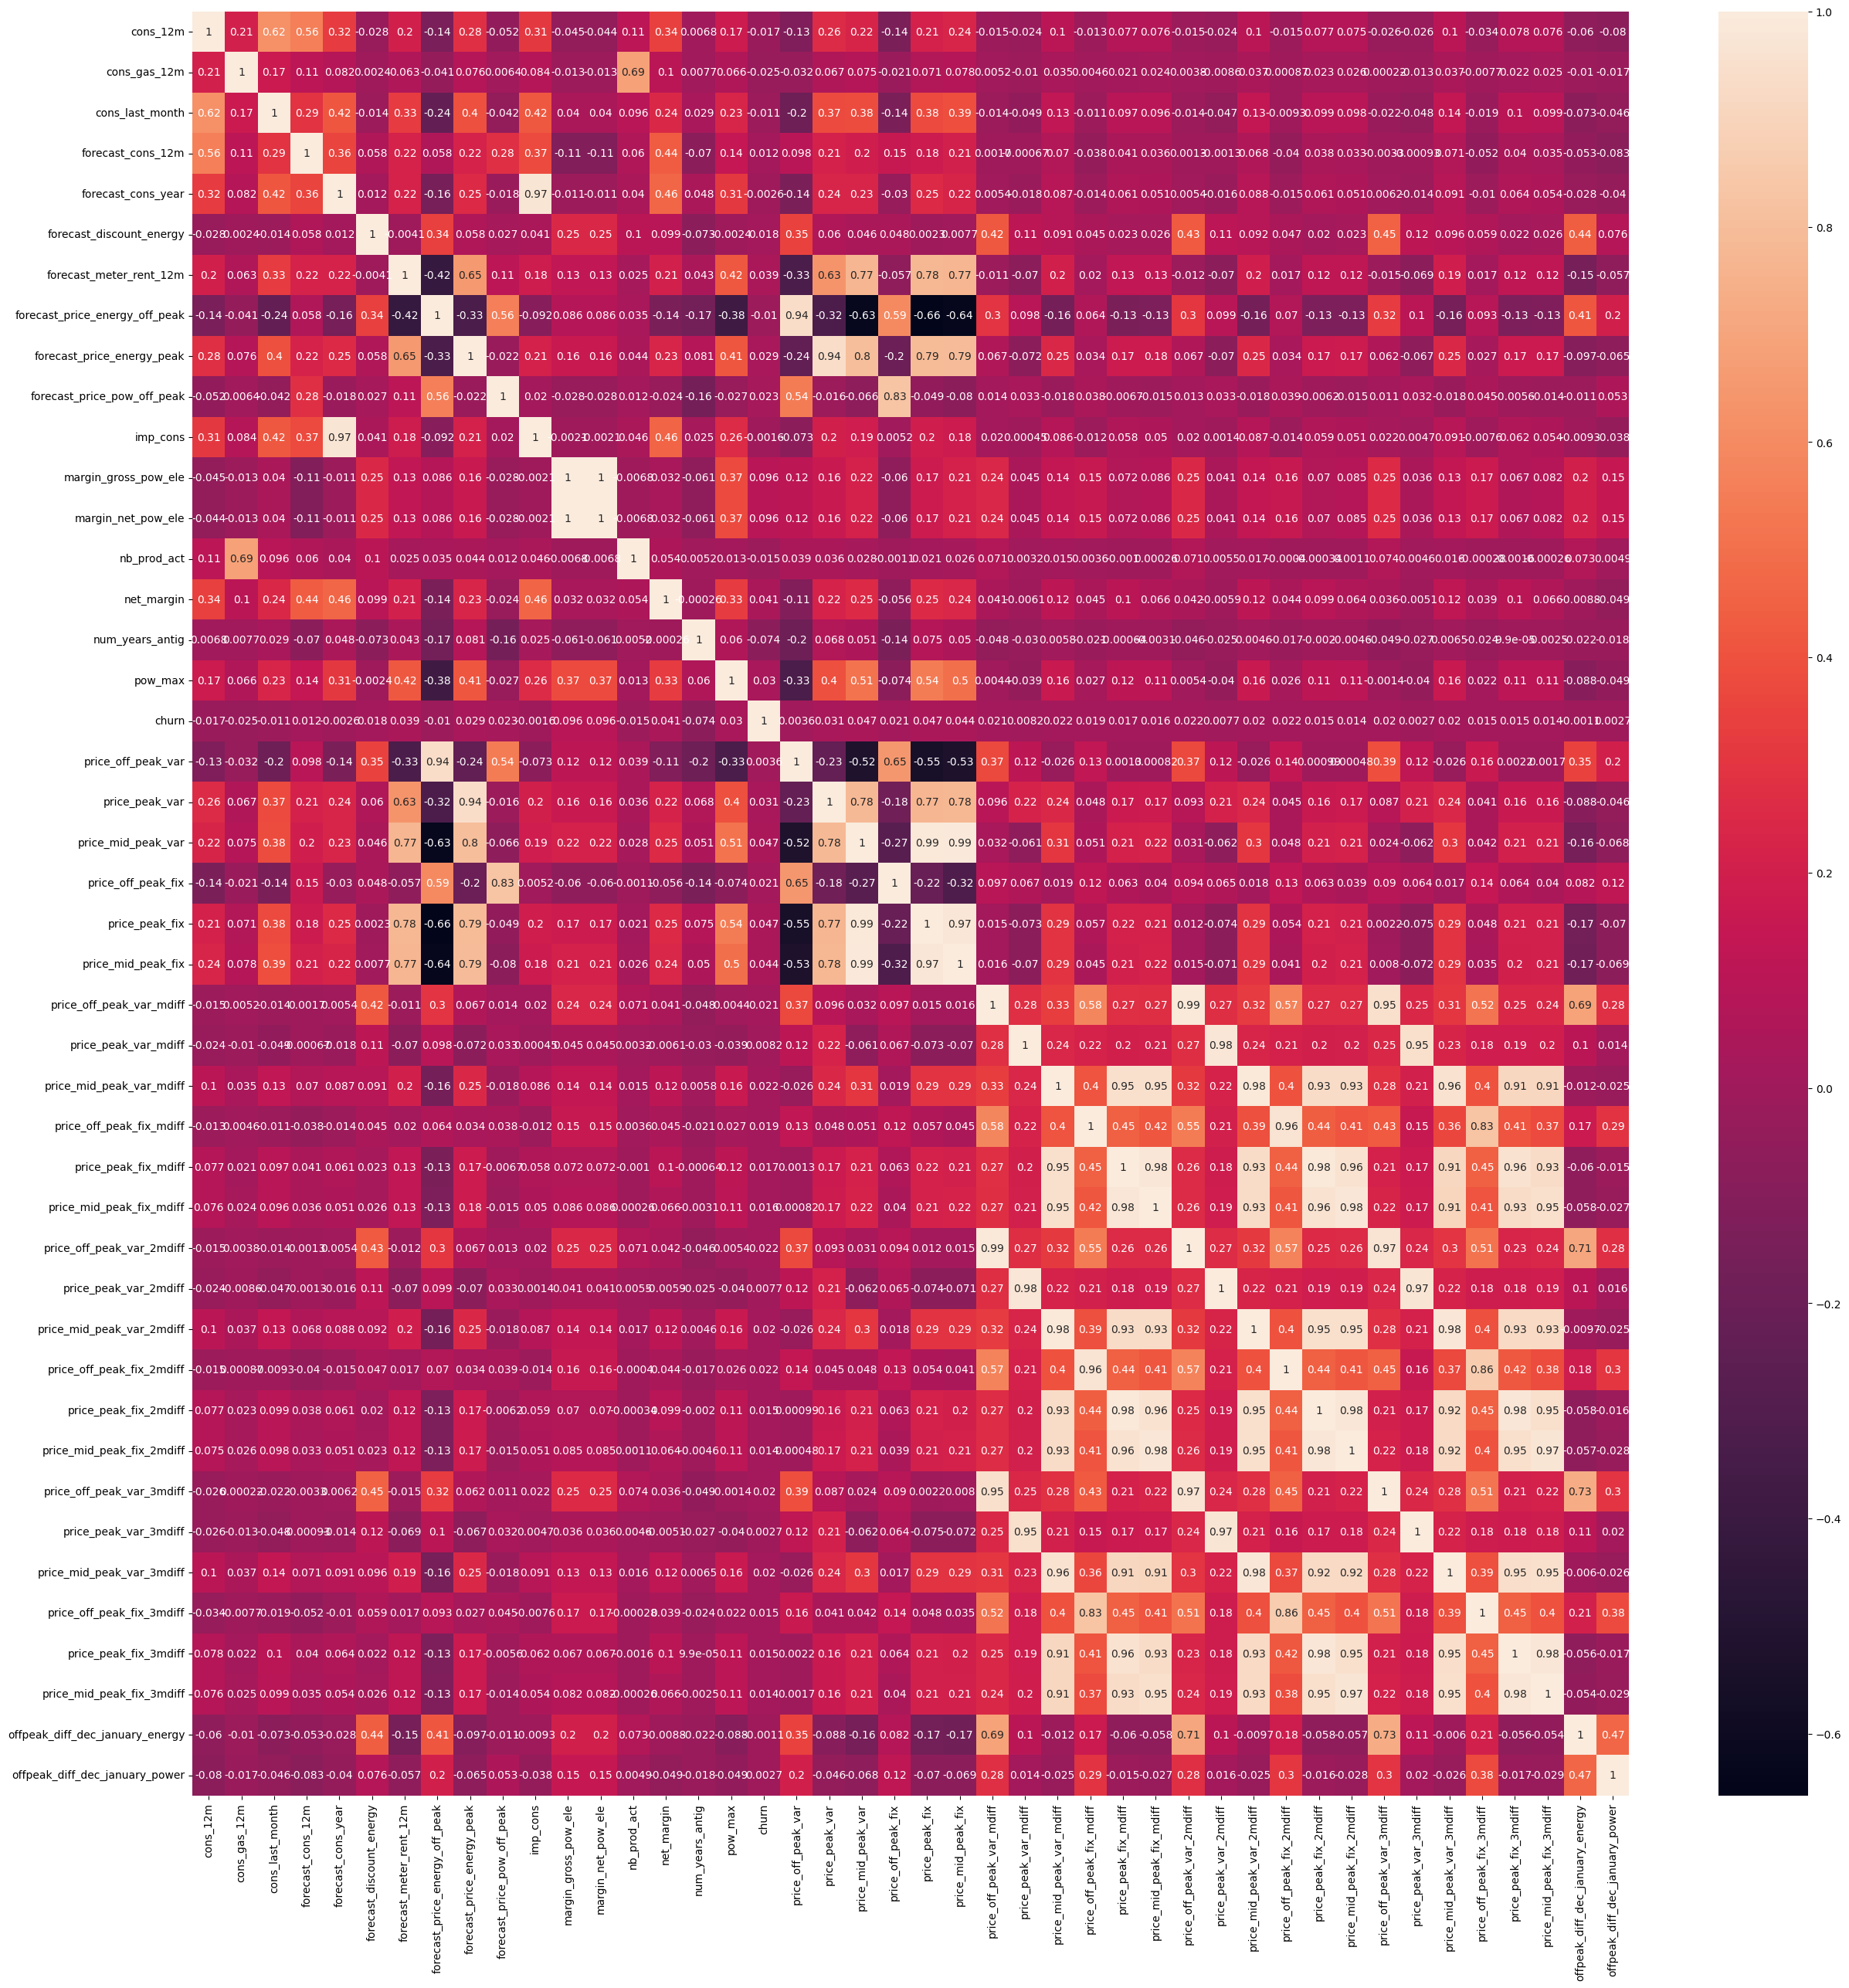

In [215]:
client_corr=client_df.select_dtypes(['number']).corr()

fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(client_corr, annot=True)
plt.show()

In [216]:
client_df=client_df.merge(diff,on='id',how='left')
training=client_df.copy()
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 14606 non-null  object        
 1   channel_sales                      14606 non-null  object        
 2   cons_12m                           14606 non-null  float64       
 3   cons_gas_12m                       14606 non-null  float64       
 4   cons_last_month                    14606 non-null  float64       
 5   date_activ                         14606 non-null  datetime64[ns]
 6   date_end                           14606 non-null  datetime64[ns]
 7   date_modif_prod                    14606 non-null  datetime64[ns]
 8   date_renewal                       14606 non-null  datetime64[ns]
 9   forecast_cons_12m                  14606 non-null  float64       
 10  forecast_cons_year                

Tree-based models have the benefit of not needing variables to be normalized and are okay when dealing with outliers. The log of the skewed distributions found in the EDA should be okay.

In [217]:
X['origin_up'].value_counts()

0    7097
1    4294
2    3148
3      64
4       2
5       1
Name: origin_up, dtype: int64

In [218]:
y = training['churn']
X = training.drop(columns=['id','churn','price_date'])
y.value_counts()

0    13187
1     1419
Name: churn, dtype: int64

good that there are no NaN in y. Let us now map non-numerical values to integers (such as channels of sales and has_gas)

In [219]:
X['channel_sales']=X['channel_sales'].map({'foosdfpfkusacimwkcsosbicdxkicaua':0,'MISSING':1,'lmkebamcaaclubfxadlmueccxoimlema':2,'usilxuppasemubllopkaafesmlibmsdf':3,'ewpakwlliwisiwduibdlfmalxowmwpci':4,'sddiedcslfslkckwlfkdpoeeailfpeds':5,'epumfxlbckeskwekxbiuasklxalciiuu':6,'fixdbufsefwooaasfcxdxadsiekoceaa':7})
X['has_gas']=X['has_gas'].map({'t':0,'f':1})
X['origin_up']=X['origin_up'].map({'lxidpiddsbxsbosboudacockeimpuepw':0,'kamkkxfxxuwbdslkwifmmcsiusiuosws':1,'ldkssxwpmemidmecebumciepifcamkci':2,'MISSING':3,'usapbepcfoloekilkwsdiboslwaxobdp':4,'ewxeelcelemmiwuafmddpobolfuxioce':5})

Lets convert all the dates to years as well

In [220]:
metric=['date_activ','date_end','date_modif_prod','date_renewal']
for metric in metric:
    X[metric]=X[metric].dt.year

Now we can build our model

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [224]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)

RandomForestClassifier()

In [226]:
y_pred = rfmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ',accuracy)

accuracy:  0.9055441478439425


In [171]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rfmodel = RandomForestClassifier()
rand_search = RandomizedSearchCV(rfmodel, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb5066a4220>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb50636bb20>})

In [172]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 452}


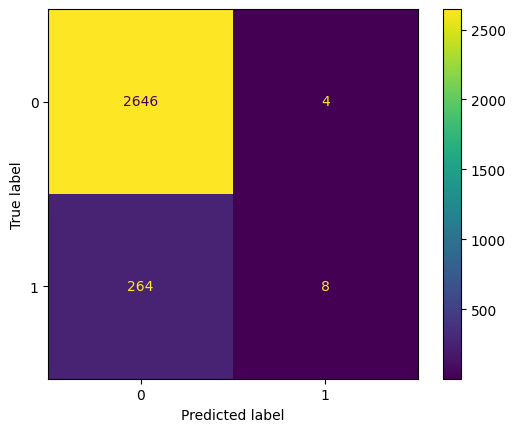

In [173]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [178]:
y_pred=best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9082819986310746
Precision: 0.6666666666666666
Recall: 0.029411764705882353


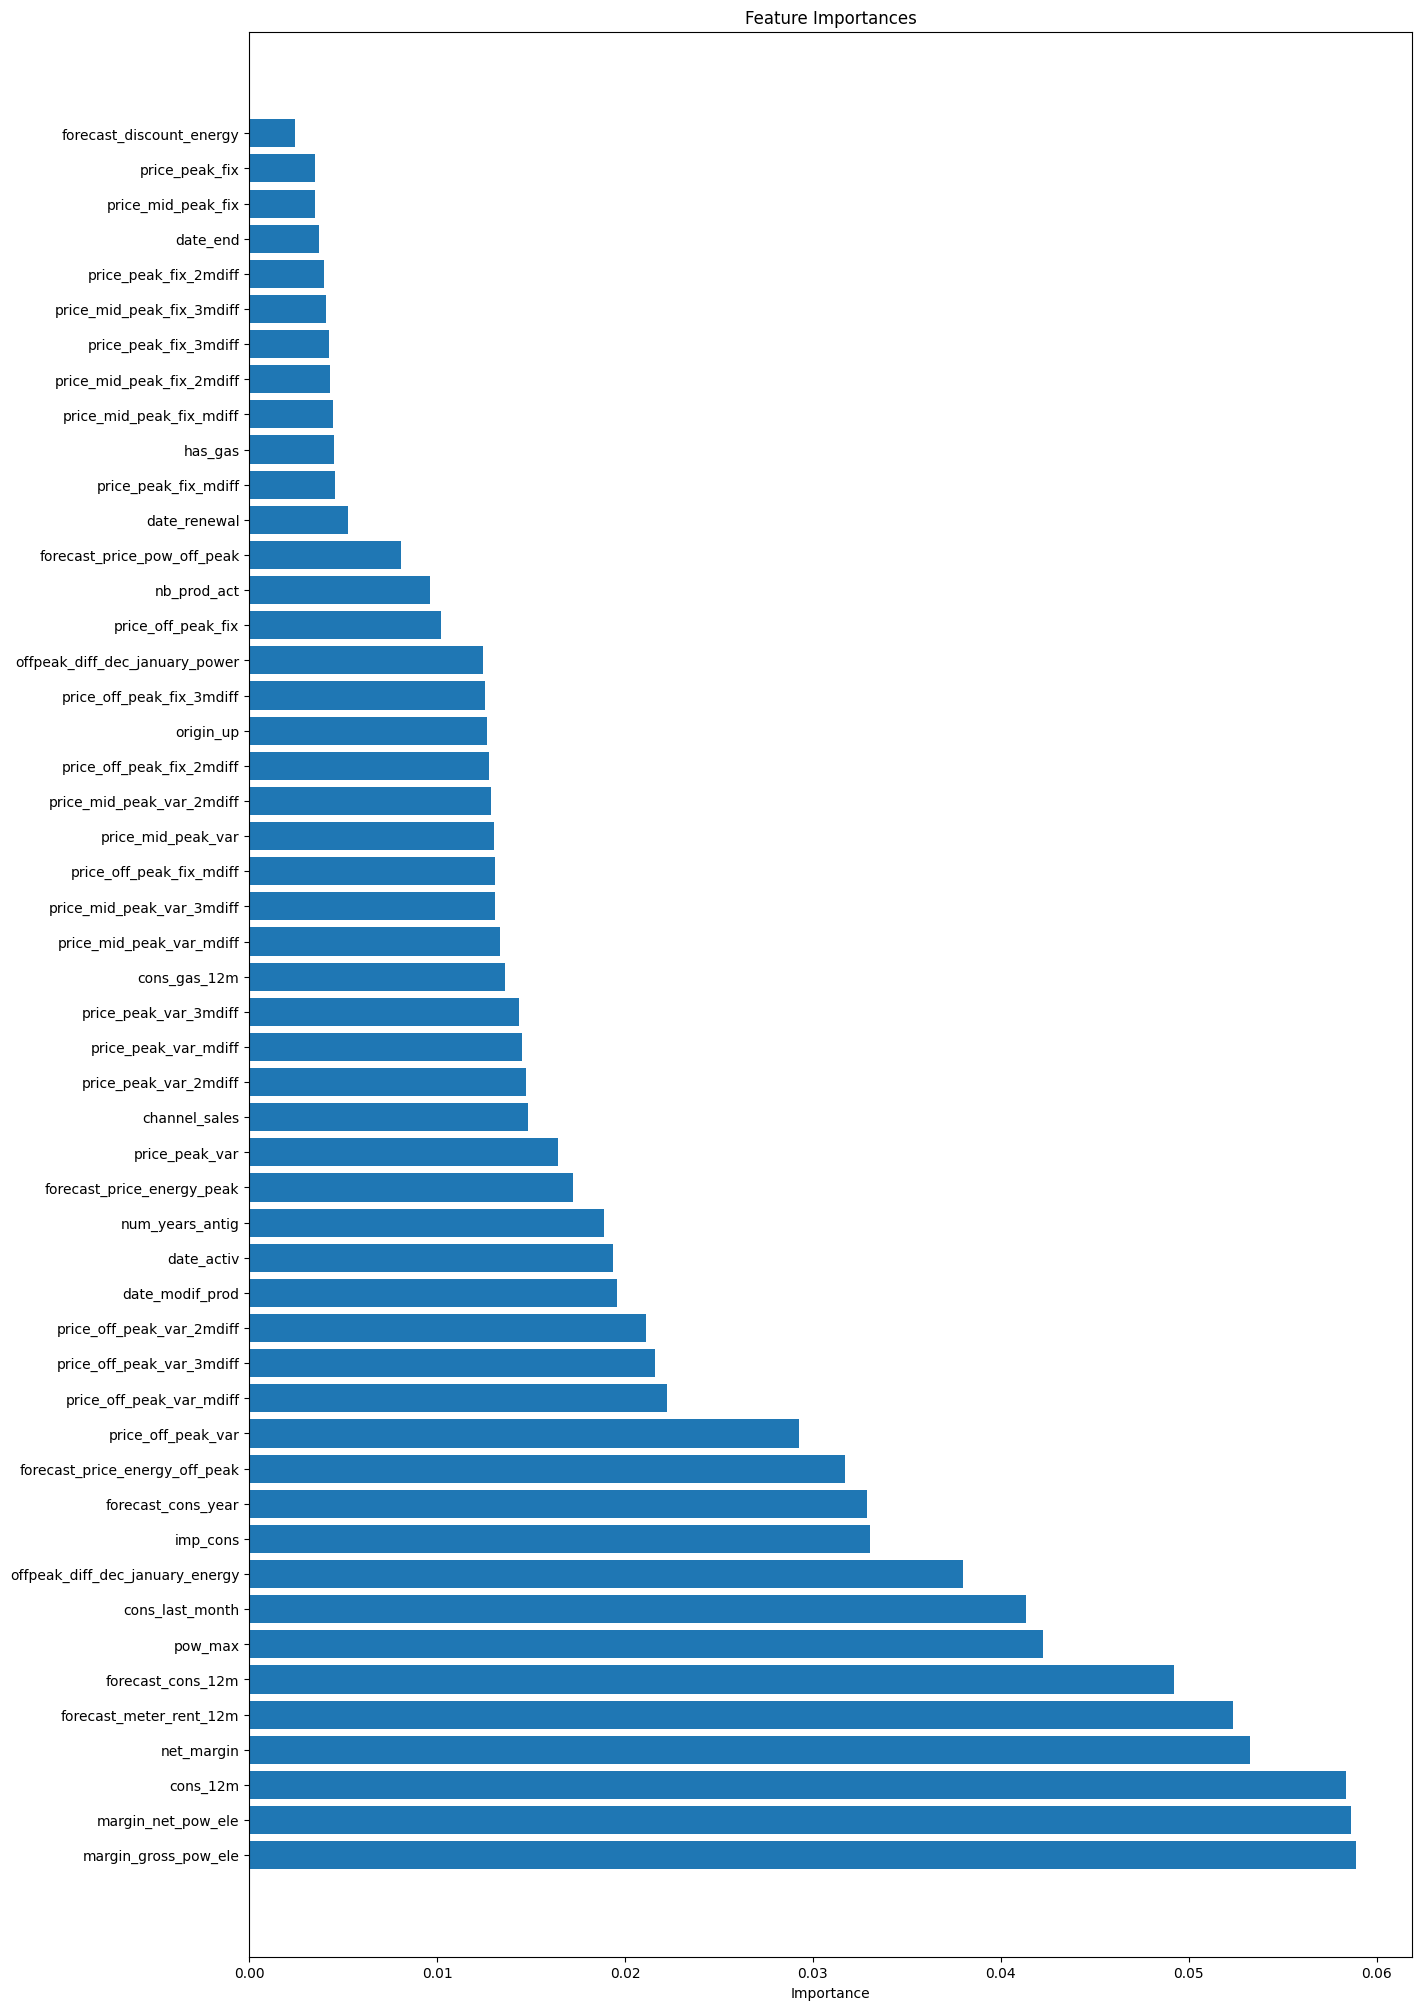

In [195]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_importances.index)
plt.xlabel('Importance')
plt.show()

From the confusion matrix, we have quite a high false negative count with our model (up to 10%). However, we are able to accurately estimate around 90.8% of cases.